In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [34]:
data = pd.read_csv("../data/adult.csv")
df = pd.DataFrame(data)
df = df[~(df == '?').any(axis=1)]
df["salary K$"] = pd.to_numeric(df["salary K$"], errors="coerce")
df["salary"] = df["salary"].str.strip()
df["salary"] = df.apply(lambda row: "<=50K" if row["salary K$"] <= 50 else ">50K", axis=1)
df


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [54]:
men_count = df[df["sex"] == "Male"].shape[0]
women_count = df[df["sex"] == "Female"].shape[0]

print(f"Count of Men: {men_count}")
print(f"Count of Women: {women_count}")

Count of Men: 20380
Count of Women: 9782


# Task 2
Find the average age of men in dataset

In [56]:
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [75]:
country_percentage = df["native-country"].value_counts(normalize=True) * 100
country_percentage["Poland"]

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [89]:
age_salary_over_50k = df[df["salary"] == ">50K"]["age"]
mean_over = age_salary_over_50k.mean()
standard_deviation_over = age_salary_over_50k.std()

print(f"Mean of age where salary over 50K is {mean_over}")
print(f"Standard deviation of age where salary over 50K is {standard_deviation_over}\n")

age_salary_less_than_50k = df[df["salary"] == "<=50K"]["age"]
mean_less = age_salary_less_than_50k.mean()
standard_deviation_less = age_salary_less_than_50k.std()

print(f"Mean of age where salary less 50K is {mean_less}")
print(f"Standard deviation of age where salary less 50K is {standard_deviation_less}")


Mean of age where salary over 50K is 43.95911028236548
Standard deviation of age where salary over 50K is 10.269632835673852

Mean of age where salary less 50K is 36.60806038668668
Standard deviation of age where salary less 50K is 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [93]:
high_education_levels = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[(df["salary"] == ">50K") & (~df["education"].isin(high_education_levels))]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [94]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [126]:
df["marital-category"] = df["marital-status"].apply(lambda status: "Married" if status.startswith("Married") else "Non-Married")
married_men_salary = df[(df["marital-category"] == "Married") & (df["sex"] == "Male")]["salary K$"].mean()
non_married_men_salary = df[(df["marital-category"] == "Non-Married") & (df["sex"] == "Male")]["salary K$"].mean()

if married_men_salary > non_married_men_salary:
    print("Married men in average earns more than non married men")
else:
    print("Non-Married men in average earning more than married men")

Married men in average earns more than non married men


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [160]:
max_hours_per_week = df["hours-per-week"].describe()["max"]
same_hours = df[df["hours-per-week"] == max_hours_per_week].shape[0]

print(f"Max hours per week is {max_hours_per_week} and {same_hours} people work in the same")

Max hours per week is 99.0 and 78 people work in the same


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

([<matplotlib.axis.YTick at 0x1cb127ef3d0>,
 [Text(0, 0, 'Unnamed: 0'),
  Text(0, 1, 'age'),
  Text(0, 2, 'workclass'),
  Text(0, 3, 'education'),
  Text(0, 4, 'marital-status'),
  Text(0, 5, 'occupation'),
  Text(0, 6, 'relationship'),
  Text(0, 7, 'race'),
  Text(0, 8, 'sex'),
  Text(0, 9, 'hours-per-week'),
  Text(0, 10, 'native-country'),
  Text(0, 11, 'salary'),
  Text(0, 12, 'salary K$')])

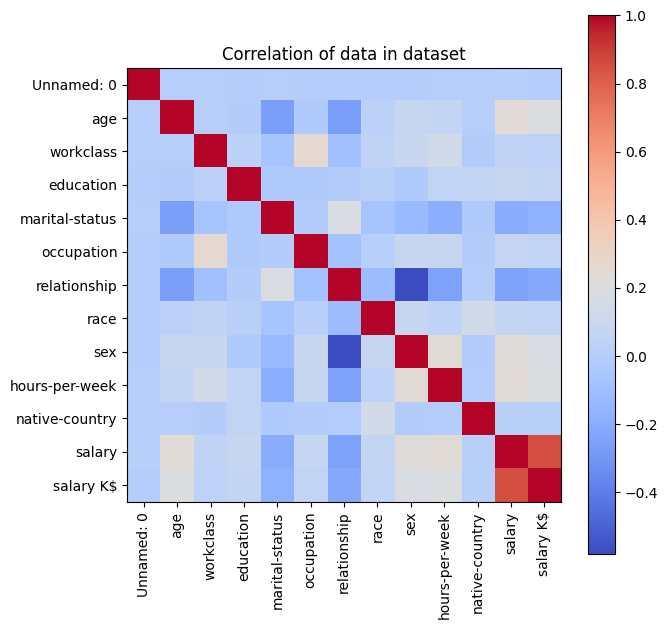

In [181]:
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(7, 7))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.title("Correlation of data in dataset")
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)